In [9]:
import matplotlib.pyplot as plt
import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam, Adagrad, Adadelta, Adamax, SGD
from keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau, TensorBoard

import tensorflow as tf
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

%matplotlib inline

In [2]:
def Bin2Int_converter(y_OH):
    output = []
    for row in y_OH:
        int_val = int(''.join(str(i) for i in row),2)
        output.append(int_val)
    return np.asarray(output)

In [4]:
## Creating a Dataset
N_datapoints = 100000
n_labels = 100

X = np.random.random_integers(0,n_labels,size=(N_datapoints,2))
y = np.sum(X,axis=1)

## Normalizing the inputs
# X = X/100.0

## Converting the inputs into binary representation
for counter, digits in enumerate(X[:,0]):
    bin_rep = [int(i) for i in "{0:07b}".format(digits)]
    if counter==0:
        x_OH1 = bin_rep
    else:
        x_OH1 = np.vstack([x_OH1, bin_rep])
        
for counter, digits in enumerate(X[:,1]):
    bin_rep = [int(i) for i in "{0:07b}".format(digits)]
    if counter==0:
        x_OH2 = bin_rep
    else:
        x_OH2 = np.vstack([x_OH2, bin_rep])
X_OH = np.hstack([x_OH1,x_OH2])

## Converting the outputs into binary representation
for counter, digits in enumerate(y):
    bin_rep = [int(i) for i in "{0:08b}".format(digits)]
    if counter==0:
        y_OH = bin_rep
    else:
        y_OH = np.vstack([y_OH, bin_rep])


## Train Test Split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_OH, y_OH, test_size=0.2, random_state=42)

## Removal of 50 from the train set
IntY_train  = Bin2Int_converter(y_train)
ind50 = IntY_train == 50
# ind50  = y_train[:,49] == 1
y50 = y_train[ind50]
y_train = y_train[~ind50,:]
x50 = X_train[ind50,:]
X_train = X_train[~ind50,:]

print 'Size of Training set', X_train.shape

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  """


Size of Training set (79588, 14)


In [5]:
## Creating the Deep-learning network
# Training Parameters 
learning_rate = 0.1
training_epochs = 1000

batch_size = int(0.8*N_datapoints)

# Network Parameters
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 50 # 2nd layer number of neurons
n_hidden_3 = 20 # 2nd layer number of neurons
n_hidden_4 = 20
n_hidden_5 = 20
n_hidden_6 = 20
n_classes = 8 #2*n_labels+1 # MNIST classes for prediction(digits 0-9 )

Inp = Input(shape=(X_train.shape[1],))
x = Dense(n_hidden_1, activation='tanh', name = "Dense_1")(Inp)
# x = Dropout(0.8)(x)
x = Dense(n_hidden_2, activation='tanh', name = "Dense_2")(x)
# x = Dropout(0.8)(x)
x = Dense(n_hidden_3, activation='tanh', name = "Dense_3")(x)
# x = Dropout(0.5)(x)
x = Dense(n_hidden_4, activation='tanh', name = "Dense_4")(x)
x = Dense(n_hidden_5, activation='tanh', name = "Dense_5")(x)
x = Dense(n_hidden_6, activation='tanh', name = "Dense_6")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

model = Model(Inp, output)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 14)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 100)               1500      
_________________________________________________________________
Dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
Dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
Dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
Dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
Dense_6 (Dense)              (None, 20)                420       
__________

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [6]:
## Determine benchmark accuracy of test_set
# print "Benchmark Accuracy of testset = %0.4f" %(sum(lb.inverse_transform(y_test) != 50)/float(len(y_test))) # Use Label Binarizer
print "Benchmark Accuracy of testset = %0.4f" %(sum(Bin2Int_converter(y_test) != 50)/float(len(y_test))) # Use Binary Rep

Benchmark Accuracy of testset = 0.9946


In [7]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(X_test, y_test))

Train on 159186 samples, validate on 40000 samples
Epoch 1/800
159186/159186 [==============================] - 0s - loss: 8.0966 - acc: 0.0485 - val_loss: 8.0040 - val_acc: 0.0884
Epoch 2/800
159186/159186 [==============================] - 0s - loss: 8.0075 - acc: 0.0890 - val_loss: 7.9682 - val_acc: 0.1587
Epoch 3/800
159186/159186 [==============================] - 0s - loss: 7.9707 - acc: 0.1587 - val_loss: 7.9488 - val_acc: 0.2402
Epoch 4/800
159186/159186 [==============================] - 0s - loss: 7.9509 - acc: 0.2415 - val_loss: 7.9281 - val_acc: 0.2968
Epoch 5/800
159186/159186 [==============================] - 0s - loss: 7.9301 - acc: 0.2987 - val_loss: 7.9061 - val_acc: 0.3124
Epoch 6/800
159186/159186 [==============================] - 0s - loss: 7.9082 - acc: 0.3138 - val_loss: 7.8879 - val_acc: 0.2882
Epoch 7/800
159186/159186 [==============================] - 0s - loss: 7.8902 - acc: 0.2899 - val_loss: 7.8758 - val_acc: 0.2357
Epoch 8/800
159186/159186 [============

159186/159186 [==============================] - 0s - loss: 7.1462 - acc: 0.4735 - val_loss: 7.1379 - val_acc: 0.4727
Epoch 126/800
159186/159186 [==============================] - 1s - loss: 7.1417 - acc: 0.4768 - val_loss: 7.1335 - val_acc: 0.4742
Epoch 127/800
159186/159186 [==============================] - 0s - loss: 7.1373 - acc: 0.4789 - val_loss: 7.1292 - val_acc: 0.4753
Epoch 128/800
159186/159186 [==============================] - 0s - loss: 7.1331 - acc: 0.4803 - val_loss: 7.1251 - val_acc: 0.4776
Epoch 129/800
159186/159186 [==============================] - 0s - loss: 7.1289 - acc: 0.4830 - val_loss: 7.1210 - val_acc: 0.4796
Epoch 130/800
159186/159186 [==============================] - 0s - loss: 7.1249 - acc: 0.4854 - val_loss: 7.1170 - val_acc: 0.4832
Epoch 131/800
159186/159186 [==============================] - 0s - loss: 7.1209 - acc: 0.4887 - val_loss: 7.1132 - val_acc: 0.4855
Epoch 132/800
159186/159186 [==============================] - 0s - loss: 7.1170 - acc: 0.

159186/159186 [==============================] - 0s - loss: 6.9132 - acc: 0.5839 - val_loss: 6.9084 - val_acc: 0.6018
Epoch 250/800
159186/159186 [==============================] - 0s - loss: 6.9120 - acc: 0.6026 - val_loss: 6.9076 - val_acc: 0.5716
Epoch 251/800
159186/159186 [==============================] - 0s - loss: 6.9114 - acc: 0.5738 - val_loss: 6.9082 - val_acc: 0.6155
Epoch 252/800
159186/159186 [==============================] - 0s - loss: 6.9119 - acc: 0.6162 - val_loss: 6.9093 - val_acc: 0.5511
Epoch 253/800
159186/159186 [==============================] - 1s - loss: 6.9131 - acc: 0.5539 - val_loss: 6.9108 - val_acc: 0.6263
Epoch 254/800
159186/159186 [==============================] - 1s - loss: 6.9146 - acc: 0.6266 - val_loss: 6.9040 - val_acc: 0.5510
Epoch 255/800
159186/159186 [==============================] - 1s - loss: 6.9077 - acc: 0.5538 - val_loss: 6.8984 - val_acc: 0.6009
Epoch 256/800
159186/159186 [==============================] - 1s - loss: 6.9021 - acc: 0.

159186/159186 [==============================] - 1s - loss: 6.7046 - acc: 0.5183 - val_loss: 6.7013 - val_acc: 0.5537
Epoch 374/800
159186/159186 [==============================] - 0s - loss: 6.7035 - acc: 0.5529 - val_loss: 6.6991 - val_acc: 0.5234
Epoch 375/800
159186/159186 [==============================] - 1s - loss: 6.7012 - acc: 0.5227 - val_loss: 6.6972 - val_acc: 0.5510
Epoch 376/800
159186/159186 [==============================] - 0s - loss: 6.6993 - acc: 0.5501 - val_loss: 6.6952 - val_acc: 0.5319
Epoch 377/800
159186/159186 [==============================] - 0s - loss: 6.6973 - acc: 0.5314 - val_loss: 6.6936 - val_acc: 0.5458
Epoch 378/800
159186/159186 [==============================] - 0s - loss: 6.6956 - acc: 0.5435 - val_loss: 6.6923 - val_acc: 0.5439
Epoch 379/800
159186/159186 [==============================] - 0s - loss: 6.6943 - acc: 0.5425 - val_loss: 6.6912 - val_acc: 0.5394
Epoch 380/800
159186/159186 [==============================] - 0s - loss: 6.6931 - acc: 0.

159186/159186 [==============================] - 1s - loss: 6.5695 - acc: 0.5686 - val_loss: 6.5671 - val_acc: 0.5570
Epoch 498/800
159186/159186 [==============================] - 1s - loss: 6.5678 - acc: 0.5586 - val_loss: 6.5661 - val_acc: 0.5642
Epoch 499/800
159186/159186 [==============================] - 1s - loss: 6.5663 - acc: 0.5678 - val_loss: 6.5638 - val_acc: 0.5597
Epoch 500/800
159186/159186 [==============================] - 1s - loss: 6.5644 - acc: 0.5618 - val_loss: 6.5625 - val_acc: 0.5622
Epoch 501/800
159186/159186 [==============================] - 1s - loss: 6.5629 - acc: 0.5660 - val_loss: 6.5611 - val_acc: 0.5620
Epoch 502/800
159186/159186 [==============================] - 0s - loss: 6.5615 - acc: 0.5649 - val_loss: 6.5600 - val_acc: 0.5618
Epoch 503/800
159186/159186 [==============================] - 0s - loss: 6.5604 - acc: 0.5647 - val_loss: 6.5593 - val_acc: 0.5617
Epoch 504/800
159186/159186 [==============================] - 0s - loss: 6.5596 - acc: 0.

159186/159186 [==============================] - 0s - loss: 6.4236 - acc: 0.5416 - val_loss: 6.4220 - val_acc: 0.5394
Epoch 622/800
159186/159186 [==============================] - 0s - loss: 6.4224 - acc: 0.5348 - val_loss: 6.4208 - val_acc: 0.5458
Epoch 623/800
159186/159186 [==============================] - 0s - loss: 6.4211 - acc: 0.5411 - val_loss: 6.4195 - val_acc: 0.5404
Epoch 624/800
159186/159186 [==============================] - 0s - loss: 6.4199 - acc: 0.5352 - val_loss: 6.4183 - val_acc: 0.5467
Epoch 625/800
159186/159186 [==============================] - 0s - loss: 6.4187 - acc: 0.5417 - val_loss: 6.4170 - val_acc: 0.5403
Epoch 626/800
159186/159186 [==============================] - 0s - loss: 6.4174 - acc: 0.5354 - val_loss: 6.4158 - val_acc: 0.5476
Epoch 627/800
159186/159186 [==============================] - 0s - loss: 6.4161 - acc: 0.5424 - val_loss: 6.4145 - val_acc: 0.5400
Epoch 628/800
159186/159186 [==============================] - 0s - loss: 6.4149 - acc: 0.

159186/159186 [==============================] - 0s - loss: 6.2550 - acc: 0.5278 - val_loss: 6.2543 - val_acc: 0.5102
Epoch 746/800
159186/159186 [==============================] - 0s - loss: 6.2537 - acc: 0.5048 - val_loss: 6.2529 - val_acc: 0.5258
Epoch 747/800
159186/159186 [==============================] - 0s - loss: 6.2523 - acc: 0.5208 - val_loss: 6.2516 - val_acc: 0.5300
Epoch 748/800
159186/159186 [==============================] - 0s - loss: 6.2511 - acc: 0.5245 - val_loss: 6.2505 - val_acc: 0.5101
Epoch 749/800
159186/159186 [==============================] - 0s - loss: 6.2498 - acc: 0.5045 - val_loss: 6.2490 - val_acc: 0.5267
Epoch 750/800
159186/159186 [==============================] - 0s - loss: 6.2484 - acc: 0.5214 - val_loss: 6.2478 - val_acc: 0.5254
Epoch 751/800
159186/159186 [==============================] - 0s - loss: 6.2471 - acc: 0.5201 - val_loss: 6.2466 - val_acc: 0.5099
Epoch 752/800
159186/159186 [==============================] - 0s - loss: 6.2458 - acc: 0.

In [8]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.figure(figsize=(20,8))
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

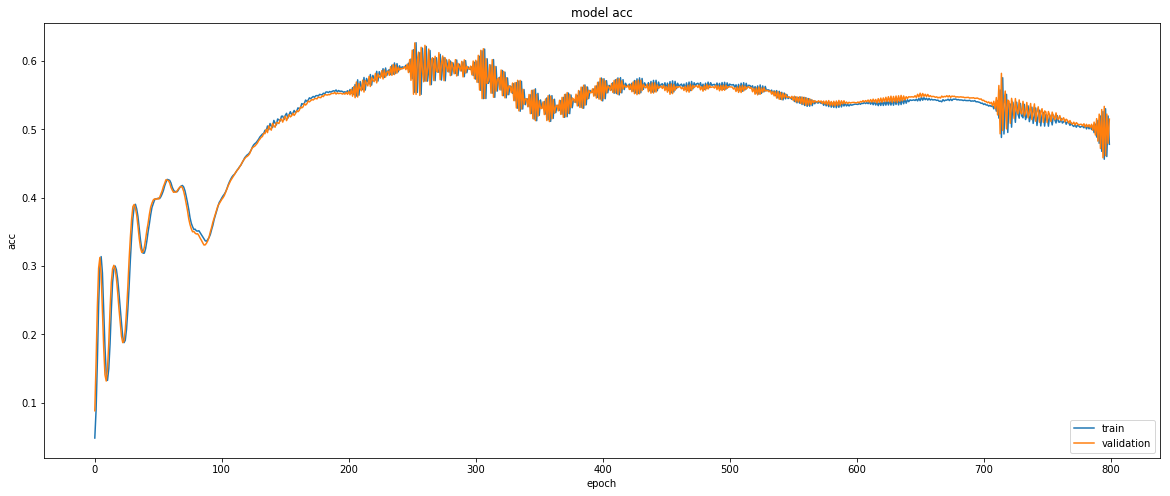

In [9]:
plot_train(history)

In [10]:
preds = model.predict(x50)

In [11]:
Bin2Int_converter(preds)

ValueError: invalid literal for int() with base 2: '8.48652e-050.006535060.3328440.1722490.1937810.1629270.1286480.00293085'

In [16]:
learning_rate = 0.1
training_epochs = 1000
decay_rate = learning_rate / training_epochs 
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
callbacks = [EarlyStopping(monitor='loss', min_delta=0.001,patience=3), 
             LearningRateScheduler(lambda epoch:learning_rate/(1+ decay_rate * epoch)),
            ReduceLROnPlateau(monitor='loss'),
            TensorBoard()]

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [18]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    callbacks = callbacks,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(X_test, y_test))

Train on 79588 samples, validate on 20000 samples
Epoch 1/1000
79588/79588 [==============================] - 0s - loss: 6.8267 - acc: 0.5695 - val_loss: 7.1528 - val_acc: 0.4157
Epoch 2/1000
79588/79588 [==============================] - 0s - loss: 7.1634 - acc: 0.4195 - val_loss: 6.9418 - val_acc: 0.5434
Epoch 3/1000
79588/79588 [==============================] - 0s - loss: 6.9587 - acc: 0.5474 - val_loss: 6.8792 - val_acc: 0.4366
Epoch 4/1000
79588/79588 [==============================] - 0s - loss: 6.8958 - acc: 0.4389 - val_loss: 6.9430 - val_acc: 0.3711
Epoch 5/1000
79588/79588 [==============================] - 0s - loss: 6.9560 - acc: 0.3734 - val_loss: 6.7749 - val_acc: 0.5158


In [ ]:
plot_train(history)

In [16]:
preds = model.predict(x50)

In [31]:
pred_bin = preds>=0.9
pred_bin = pred_bin.astype(int)

In [32]:
Bin2Int_converter(pred_bin)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,